# CNN - MNIST

## Partie 1 : Base de données, Analyse et Préparation

Pour aborder cette problématique de la reconnaissance des chiffres, il est primordial d’avoir une DataSet. Pour cela, vous devez télécharger la Dataset MNIST (https://github.com/teavanist/MNIST-JPG).

Par la suite, il faut développer une boucle for pour lire les images et les charger sous forme un tenseur.

Outils :
- Import os
- Import cv2
- from sklearn.model\_selection import train\_test\_split
- os.listdir(chemin)
- cv2.cvtColor(img, cv2.COLOR\_GRAY2BGR) si besoin
- cv2.resize(img,(width,height), interpolation = cv2.INTER\_AREA) si besoin
- Data.append(image) – Label.append(classe)


In [2]:
import os
import cv2
from tqdm import tqdm

def import_data(rootFolderPath):
    data = []
    data_label = []
    total = 0
    
    for root, dirs, files in os.walk(rootFolderPath):
        print(root, dirs, len(files))
        label = os.path.basename(root)
        total += len(files)
        for file in files:
            path = root+os.sep+file
            img = cv2.imread(path)
            data.append(img)
            data_label.append(label)
            
    return(data, data_label)

os.sep = '\\'
data_test, data_test_label = import_data("."+os.sep+"Dataset"+os.sep+"testing")
data_train, data_train_label = import_data("."+os.sep+"Dataset"+os.sep+"training")

print(len(data_test))
print(len(data_test_label))
print(len(data_train))
print(len(data_train_label))

.\Dataset\testing ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] 0
.\Dataset\testing\0 [] 980
.\Dataset\testing\1 [] 1135
.\Dataset\testing\2 [] 1032
.\Dataset\testing\3 [] 1010
.\Dataset\testing\4 [] 982
.\Dataset\testing\5 [] 892
.\Dataset\testing\6 [] 958
.\Dataset\testing\7 [] 1028
.\Dataset\testing\8 [] 974
.\Dataset\testing\9 [] 1009
.\Dataset\training ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] 0
.\Dataset\training\0 [] 5923
.\Dataset\training\1 [] 6742
.\Dataset\training\2 [] 5958
.\Dataset\training\3 [] 6131
.\Dataset\training\4 [] 5842
.\Dataset\training\5 [] 5421
.\Dataset\training\6 [] 5918
.\Dataset\training\7 [] 6265
.\Dataset\training\8 [] 5851
.\Dataset\training\9 [] 5949
10000
10000
60000
60000


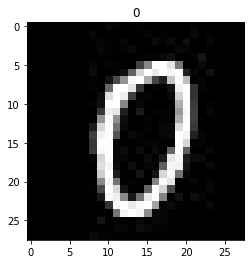

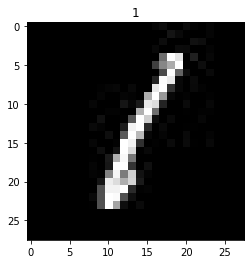

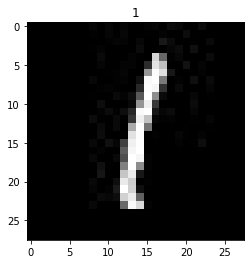

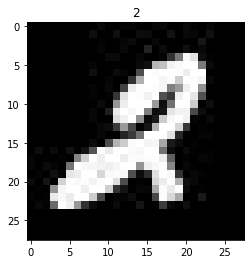

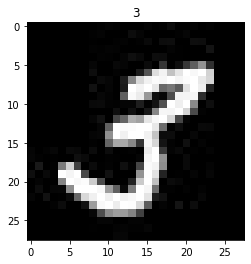

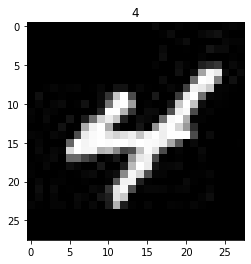

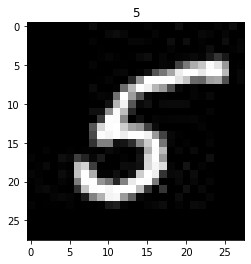

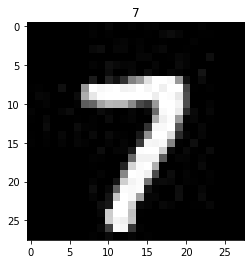

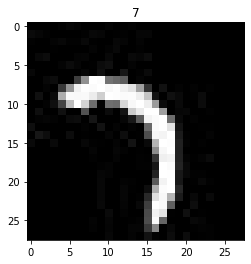

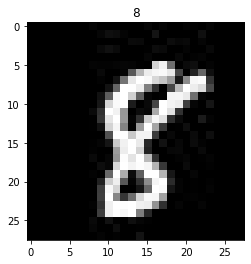

In [9]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt

for num in range(1, len(data_train), round(len(data_train)/10)):
    image = data_train[num]
    #Show the image with matplotlib
    plt.imshow(image)
    plt.title(data_train_label[num])
    plt.show()

Figure(432x288) [[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA69D98610>


TypeError: float() argument must be a string or a number, not 'module'

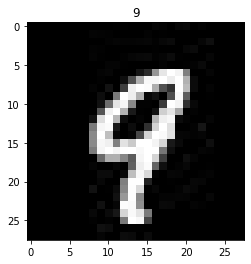

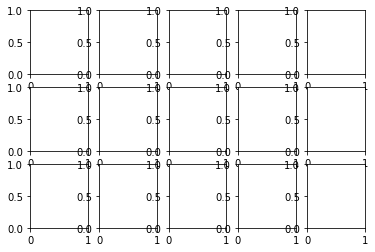

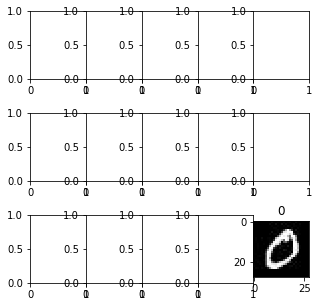

In [22]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt

def get_plot(num):
    image = data_train[num]
    #Show the image with matplotlib
    plt.imshow(image)
    plt.title(data_train_label[num])
    return plt
    # plt.show()
    
ax = []
for num in range(1, len(data_train), round(len(data_train)/16)):
    ax.append(get_plot(num))

fig, axes = plt.subplots(3, 5)
print(fig, axes)

fig, axes = plt.subplots(3,5, figsize=(5, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axes = axes.ravel()

for i in range(15):
    axes[i].contourf(get_plot(i))
    #axes[i].set_title(data_train_label[num])

## Partie 2 : Architecture CNN sur Tensorflow

Cette deuxième partie est réservée pour développer une architecture CNN sur tensorflow, et lancée par la suite l’apprentissage de CNN. Calculer l’accuracy et la matrice de confusion sur les données de test, commenter les performances obtenues. Outil : https://www.tensorflow.org/tutorials/images/cnn


### Importer TensorFlow

In [38]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

### Préparer le jeu de données

In [42]:
train_images = np.array(data_train)
train_labels = np.array(data_train_label)
test_images = np.array(data_test)
test_labels = np.array(data_test_label)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


Vérifier les données

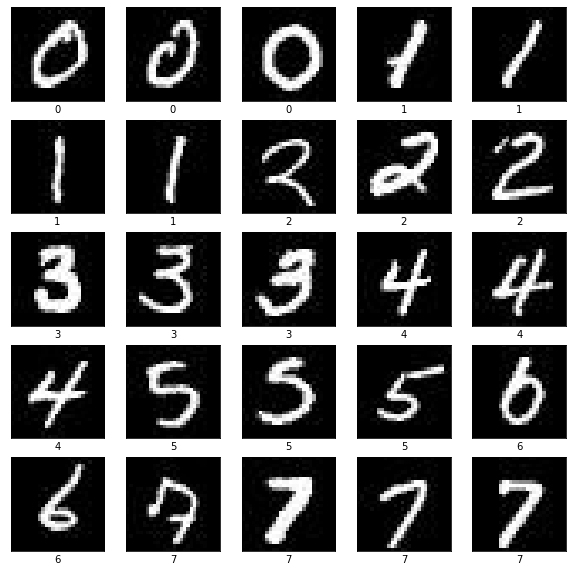

In [57]:
class_names = np.unique(np.concatenate([train_labels,test_labels]))

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i*2000])
    plt.xlabel(class_names[train_labels[i*2000].astype(int)])
plt.show()

Créer la base convolutive

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [27]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Ajouter des couches denses sur le dessus

In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [29]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Compiler et entraîner le modèle

In [30]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5283 - accuracy: 0.4415 - val_loss: 1.3273 - val_accuracy: 0.5179
Epoch 2/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.1938 - accuracy: 0.5760 - val_loss: 1.0733 - val_accuracy: 0.6191
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0413 - accuracy: 0.6366 - val_loss: 0.9984 - val_accuracy: 0.6460
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9358 - accuracy: 0.6713 - val_loss: 0.9934 - val_accuracy: 0.6554
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8610 - accuracy: 0.6995 - val_loss: 0.9059 - val_accuracy: 0.6855
Epoch 6/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.8035 - accuracy: 0.7208 - val_loss: 0.9601 - val_accuracy: 0.6677
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7507 - accuracy: 0.7380 - val_loss: 0.9710 -

Évaluer le modèle

313/313 - 3s - loss: 0.8559 - accuracy: 0.7110 - 3s/epoch - 9ms/step


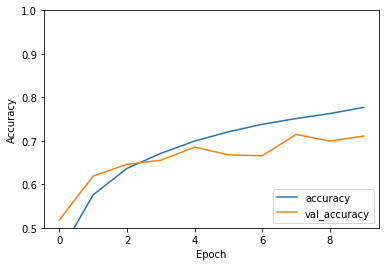

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [32]:
print(test_acc)


0.7110000252723694


## Partie 3 : Tester l’efficacité du modèle

Nous cherchons à tester le modèle développer sur des nouvelles données. Pour un début, utiliser l’application Paint pour simuler des chiffres, et tester les performances de votre modèle sur les chiffres simulés.

Il sera intéressant de développer une application python pour reconnaitre automatiquement les chiffres en intégrant votre modèle CNN.